## Question 1: Number of Accidents across Different Boroughs (2013-2023)


In [2]:
import pandas as pd

# Load the data
fact_table = pd.read_csv('fact_table.csv')
time_dim = pd.read_csv('time_dim.csv')
borough_dim = pd.read_csv('borough_dim.csv')

In [3]:
fact_table.rename(columns={'Borough_id':'borough_id'},inplace=True)

In [4]:
# Merge the datasets
merged_data = pd.merge(fact_table, time_dim, on='time_id')
merged_data = pd.merge(merged_data, borough_dim, on='borough_id')

# Filter data from 2013 to 2023
filtered_data = merged_data[(merged_data['collision_year'] >= 2013) & (merged_data['collision_year'] <= 2023)]


In [5]:
accident_counts = filtered_data.groupby('borough_name')['collision_index'].nunique().reset_index()
accident_counts.columns = ['Borough', 'Number of Accidents']
accident_counts.sort_values('Number of Accidents', ascending=False, inplace=True)

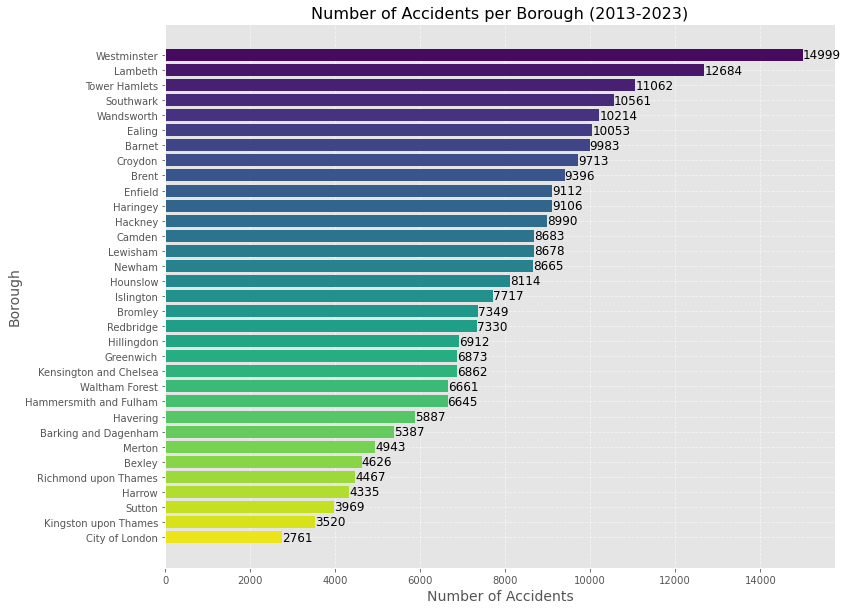

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns  # for more appealing color palettes

# Setting the style and color palette
plt.style.use('ggplot')  # Use ggplot style for more sophisticated visuals
colors = sns.color_palette('viridis', n_colors=len(accident_counts))  # Viridis is a vibrant color map

# Create a bar chart
plt.figure(figsize=(12, 10))  # Larger figure size for better readability
bars = plt.barh(accident_counts['Borough'], accident_counts['Number of Accidents'], color=colors)

# Adding a title and labels with custom font sizes for better readability
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Borough', fontsize=14)
plt.title('Number of Accidents per Borough (2013-2023)', fontsize=16)

# Invert y-axis to have the borough with the most accidents at the top
plt.gca().invert_yaxis()

# Adding value labels to each bar to show the exact number of accidents
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             '{:.0f}'.format(bar.get_width()),
             va='center', ha='left', color='black', fontsize=12)

# Enhancing the visual appearance of the axes and grid
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter grid lines

# Show the plot
plt.show()


## Question 2: Age Band with the Highest Number of Accidents (Last 10 Years)


In [11]:
import pandas as pd

# Assuming you've already loaded these in a previous step, but here's a reminder
fact_table = pd.read_csv('fact_table.csv')
casualty_dim = pd.read_csv('casualty_dim.csv')
time_dim = pd.read_csv('time_dim.csv')

# Merge the datasets
data = pd.merge(fact_table, casualty_dim, on='casualty_id')
data = pd.merge(data, time_dim, on='time_id')


In [13]:
# Assume current year is static, or you can dynamically fetch it
current_year = data['collision_year'].max()
ten_years_ago = current_year - 10

filtered_data = data[(data['collision_year'] >= ten_years_ago)]

# Aggregate data to get the number of accidents per age band
age_band_accidents = filtered_data.groupby('age_band_of_casualty').size().reset_index(name='number_of_accidents')
age_band_accidents.sort_values('number_of_accidents', ascending=False, inplace=True)

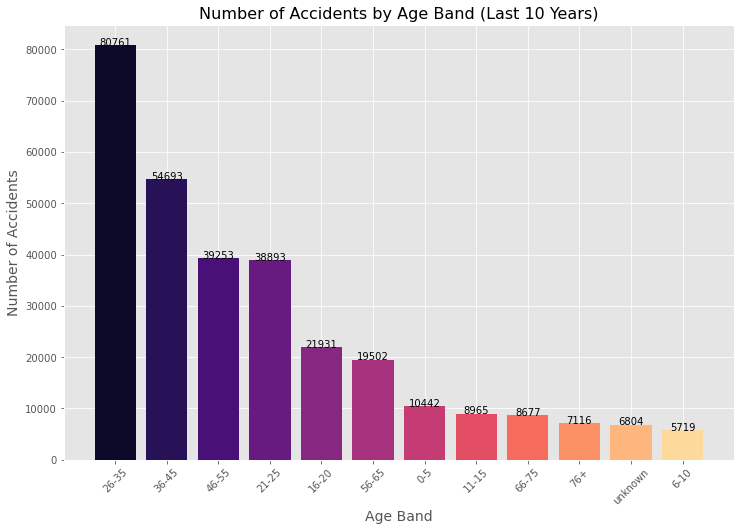

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
colors = sns.color_palette('magma', n_colors=len(age_band_accidents))

plt.figure(figsize=(12, 8))
plt.bar(age_band_accidents['age_band_of_casualty'], age_band_accidents['number_of_accidents'], color=colors)
plt.xlabel('Age Band', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.title('Number of Accidents by Age Band (Last 10 Years)', fontsize=16)
plt.xticks(rotation=45)  # Rotate the x labels for better visibility

# Add text annotations for each bar
for i, v in enumerate(age_band_accidents['number_of_accidents']):
    plt.text(i, v + 5, str(v), color='black', ha='center')

plt.show()

## Question 3: Influence of Weather & Light Conditions on Accidents (2013-2023)


In [16]:
merged_data.head()

,collision_index,severity_id,light_conditions_id,weather_conditions_id,Borough_id,casualty_id,time_id,weather_conditions,light_conditions
0,2018010080971,3,4,1,E09000007,2018010080971_1,01/01/2018 01:30,Fine no high winds,Darkness - lights lit
1,2018010080971,3,4,1,E09000007,2018010080971_2,01/01/2018 01:30,Fine no high winds,Darkness - lights lit
2,2018010080973,3,4,1,E09000025,2018010080973_1,01/01/2018 00:50,Fine no high winds,Darkness - lights lit
3,2018010080974,3,4,1,E09000019,2018010080974_1,01/01/2018 00:45,Fine no high winds,Darkness - lights lit
4,2018010080982,2,4,1,E09000011,2018010080982_1,01/01/2018 02:20,Fine no high winds,Darkness - lights lit


In [13]:
import pandas as pd

# Load your data if not already loaded
fact_table = pd.read_csv('fact_table.csv')
weather_dim = pd.read_csv('weather_dim.csv')
light_dim = pd.read_csv('light_dim.csv')
borough_dim = pd.read_csv('borough_dim.csv')
time_dim = pd.read_csv('time_dim.csv')
fact_table.rename(columns={'Borough_id':'borough_id'},inplace=True)
# Merge datasets
merged_data = pd.merge(fact_table, weather_dim, on='weather_conditions_id')
merged_data = pd.merge(merged_data, light_dim, on='light_conditions_id')
merged_data = pd.merge(merged_data, borough_dim, on='borough_id')
merged_data = pd.merge(merged_data, time_dim, on='time_id')

# Filter data from 2013 to 2023
filtered_data = merged_data[(merged_data['collision_year'] >= 2013) & (merged_data['collision_year'] <= 2023)]

In [14]:
accident_conditions = filtered_data.groupby(['weather_conditions_id', 'light_conditions_id', 'borough_name']).size().reset_index(name='number_of_accidents')
accident_conditions.sort_values('number_of_accidents', ascending=False, inplace=True)

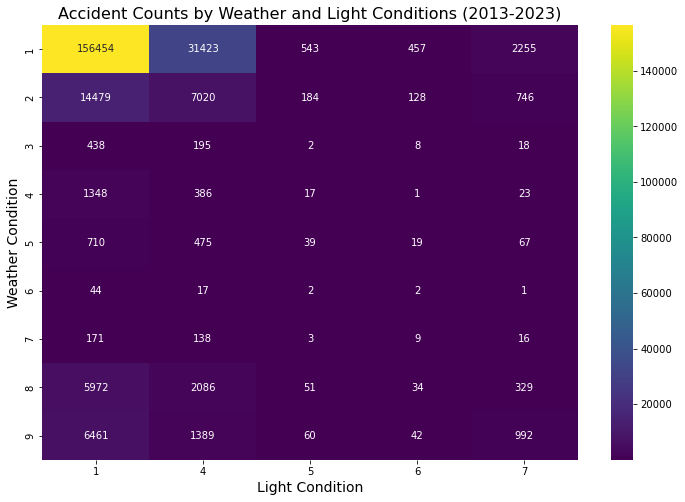

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for the heatmap
pivot_table = accident_conditions.pivot_table(index='weather_conditions_id', columns='light_conditions_id', values='number_of_accidents', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='viridis')
plt.title('Accident Counts by Weather and Light Conditions (2013-2023)', fontsize=16)
plt.xlabel('Light Condition', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.show()


## Question 4: Accident Frequency by Hours of Day & Days of the Week (2013-2023)


In [16]:
import pandas as pd

# Assuming 'collision_year' is the same as 'year' we want to filter on
data = pd.merge(fact_table, time_dim, on='time_id')

# Convert 'date' to datetime if necessary to extract the year for filtering (if 'collision_year' is not used)
data['date'] = pd.to_datetime(data['date'])

# Filter data from 2013 to 2023
filtered_data = data[(data['collision_year'] >= 2013) & (data['collision_year'] <= 2023)]


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2018' in DD/MM/YYYY format. Provide format or specify in

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/04/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/04/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/04/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/04/2013' in DD/MM/YYYY format. Provide format or specify in

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/08/2015' in DD/MM/YYYY format. Provide format or specify in

In [17]:
# Extract hour from 'time' if necessary
# filtered_data['hour'] = pd.to_datetime(filtered_data['time'], format='%H:%M').dt.hour

# Group by the hour and day of the week, and count accidents
accidents_by_time = filtered_data.groupby(['hour', 'day_of_week']).size().reset_index(name='number_of_accidents')
accidents_by_time.sort_values('number_of_accidents', ascending=False, inplace=True)


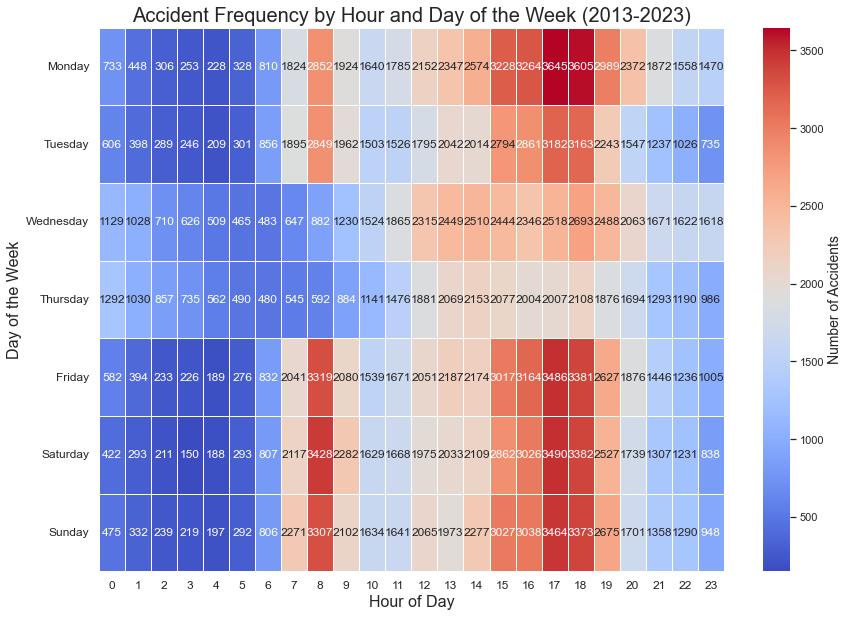

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))  # Increased figure size for better clarity and less congestion
sns.set(style="whitegrid")  # Set a style for better aesthetics

# Create a heat map with annotations and a specified color map
ax = sns.heatmap(pivot_table, annot=True, fmt="d", cmap='coolwarm', linewidths=.5, linecolor='white')

# Enhancements for aesthetics
ax.set_title('Accident Frequency by Hour and Day of the Week (2013-2023)', fontsize=20)
ax.set_xlabel('Hour of Day', fontsize=16)
ax.set_ylabel('Day of the Week', fontsize=16)
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add a color bar with a label
cbar = ax.collections[0].colorbar
cbar.set_label('Number of Accidents', fontsize=14)

# Save the figure
plt.savefig('accidents_heatmap.png', format='png', dpi=300)  # Save as a high-resolution PNG file
plt.show()


## Question 5: Provide a trend of the top 5 areas having a higher number of casualties across London City from 2013 to 2023

In [23]:
import pandas as pd

# Load your data if not already done
fact_table = pd.read_csv('fact_table.csv')
borough_dim = pd.read_csv('borough_dim.csv')
time_dim = pd.read_csv('time_dim.csv')
fact_table.rename(columns={'Borough_id':'borough_id'},inplace=True)
# Merge datasets
data = pd.merge(fact_table, borough_dim, on='borough_id')
data = pd.merge(data, time_dim, on='time_id')

# Ensure year is available and correct
data['collision_year'] = pd.to_datetime(data['date']).dt.year


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2018' in DD/MM/YYYY format. Provide format or specify in

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/07/2015' in DD/MM/YYYY format. Provide format or specify in

In [24]:
filtered_data = data[(data['collision_year'] >= 2013) & (data['collision_year'] <= 2023)]

# Aggregate data
annual_casualties = filtered_data.groupby(['collision_year', 'borough_name']).size().reset_index(name='number_of_casualties')


In [26]:
def top_n_areas(df, n=5):
    return df.nlargest(n, 'number_of_casualties')

top_5_annually = annual_casualties.groupby('collision_year').apply(top_n_areas).reset_index(drop=True)


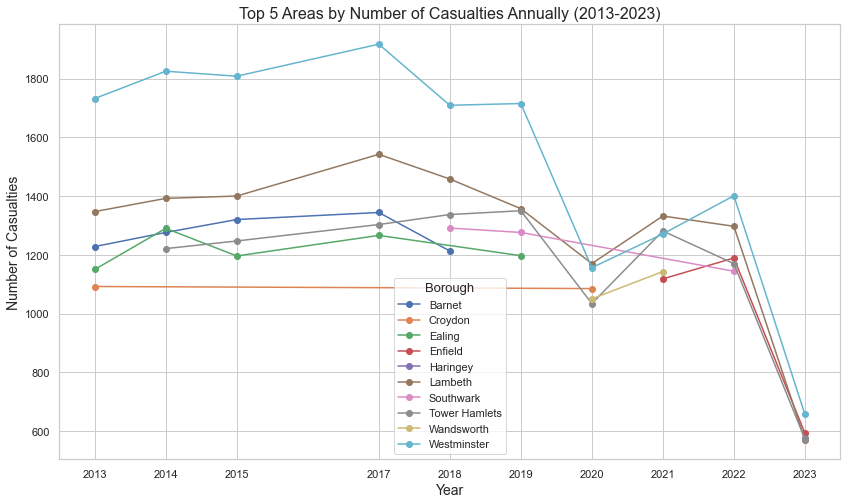

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot each area's trend line
for key, grp in top_5_annually.groupby('borough_name'):
    plt.plot(grp['collision_year'], grp['number_of_casualties'], marker='o', label=key)

plt.title('Top 5 Areas by Number of Casualties Annually (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
plt.legend(title='Borough', title_fontsize='13', fontsize='11')
plt.xticks(top_5_annually['collision_year'].unique())  # Ensure all years are shown
plt.grid(True)
plt.show()


## Question 6: What are the top 5 most accident-affected areas in London City in each year of the past decade Jul’13 to Jun’23?

In [29]:
import pandas as pd

# Load the data
fact_table = pd.read_csv('fact_table.csv')
borough_dim = pd.read_csv('borough_dim.csv')
time_dim = pd.read_csv('time_dim.csv')
fact_table.rename(columns={'Borough_id':'borough_id'},inplace=True)
# Merge the datasets
data = pd.merge(fact_table, borough_dim, on='borough_id')
data = pd.merge(data, time_dim, on='time_id')

# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Calculate the fiscal year considering July to June period
data['fiscal_year'] = (data['date'].dt.year + (data['date'].dt.month > 6)).astype(int)


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2018' in DD/MM/YYYY format. Provide format or specify in

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/09/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/09/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/09/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/09/2014' in DD/MM/YYYY format. Provide format or specify in

In [30]:
accidents_per_area = data.groupby(['fiscal_year', 'borough_name']).size().reset_index(name='number_of_accidents')


In [31]:
def top_n_areas(df, n=5):
    return df.nlargest(n, 'number_of_accidents')

top_5_annually = accidents_per_area.groupby('fiscal_year').apply(top_n_areas).reset_index(drop=True)


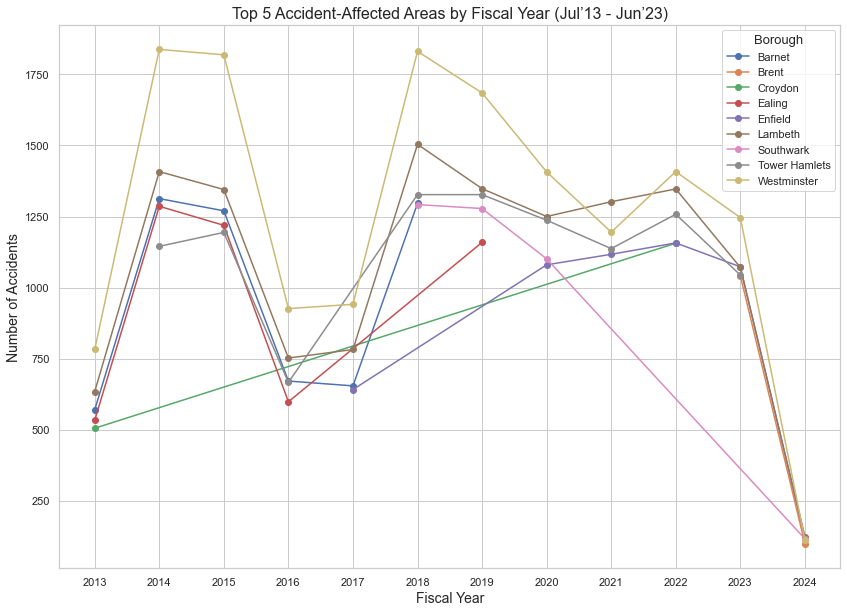

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plotting
for key, grp in top_5_annually.groupby('borough_name'):
    if grp.shape[0] > 1:  # Only plot if the borough appears in the top 5 more than once
        plt.plot(grp['fiscal_year'], grp['number_of_accidents'], marker='o', linestyle='-', label=key)

plt.title('Top 5 Accident-Affected Areas by Fiscal Year (Jul’13 - Jun’23)', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Borough', title_fontsize='13', fontsize='11')
plt.xticks(sorted(top_5_annually['fiscal_year'].unique()))  # Ensure all fiscal years are shown
plt.grid(True)
plt.show()
